# Extracting Industries from AboutC Column

In [2]:
# en_core_web_lg

import spacy
from spacy import displacy
from spacy.matcher import Matcher



def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    # append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'MATCH'}]
    matched_sents.append({'text': sent.text, 'ents': match_ents })
    
    

In [3]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
import re
pd.options.mode.chained_assignment = None  # default='warn'

df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(18892, 24)
Removed 109 duplicates (based on jobpost + Title)


In [4]:
df['AboutC'].head()

0                                                  NaN
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3                                                  NaN
4                                                  NaN
Name: AboutC, dtype: object

In [5]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', collect_sents, pattern)  # add pattern
pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern
pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
matcher.add('verb_noun', collect_sents, pattern)  # add pattern

text = """"Aregak" Universal Credit Organization CJSC was founded
by the United Methodist Committee on Relief (UMCOR) in 2006. Aregak UCO's
27 branches and 3 representations throughout Armenia and Nagorno Karabakh
support the economic development of small and medium entrepreneurs with
high quality, accessible and reliable financial services. Please visit
www.aregak.am for more information."""
text = re.sub(r'\s+', ' ', text)

doc = nlp(text)
# for token in doc:
#     print("{0}/{1} <--{2}-- {3}/{4}".format(
#         token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
matches = matcher(doc)
displacy.render(matched_sents, style='ent', manual=True, jupyter=True)

In [6]:
matched_sents

[{'text': "Aregak UCO's 27 branches and 3 representations throughout Armenia and Nagorno Karabakh support the economic development of small and medium entrepreneurs with high quality, accessible and reliable financial services.",
  'ents': [{'start': 99, 'end': 119, 'label': 'MATCH'}]},
 {'text': "Aregak UCO's 27 branches and 3 representations throughout Armenia and Nagorno Karabakh support the economic development of small and medium entrepreneurs with high quality, accessible and reliable financial services.",
  'ents': [{'start': 133, 'end': 153, 'label': 'MATCH'}]},
 {'text': "Aregak UCO's 27 branches and 3 representations throughout Armenia and Nagorno Karabakh support the economic development of small and medium entrepreneurs with high quality, accessible and reliable financial services.",
  'ents': [{'start': 159, 'end': 171, 'label': 'MATCH'}]},
 {'text': "Aregak UCO's 27 branches and 3 representations throughout Armenia and Nagorno Karabakh support the economic development of 

In [7]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
      token.shape_, token.is_alpha, token.is_stop)

" " PUNCT `` punct " False False
Aregak aregak PROPN NNP nsubjpass Xxxxx True False
" " PUNCT '' punct " False False
Universal universal PROPN NNP compound Xxxxx True False
Credit credit PROPN NNP compound Xxxxx True False
Organization organization PROPN NNP compound Xxxxx True False
CJSC cjsc PROPN NNP nsubjpass XXXX True False
was be VERB VBD auxpass xxx True True
founded found VERB VBN ROOT xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
United united PROPN NNP compound Xxxxx True False
Methodist methodist PROPN NNP compound Xxxxx True False
Committee committee PROPN NNP pobj Xxxxx True False
on on ADP IN prep xx True True
Relief relief PROPN NNP pobj Xxxxx True False
( ( PUNCT -LRB- punct ( False False
UMCOR umcor PROPN NNP appos XXXX True False
) ) PUNCT -RRB- punct ) False False
in in ADP IN prep xx True True
2006 2006 NUM CD pobj dddd False False
. . PUNCT . punct . False False
Aregak aregak PROPN NNP compound Xxxxx True False
UCO uco PROPN NNP p

## Iterate Through All

In [8]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

pattern = [{'POS':'ADJ'},{'ORTH': '-'}, {'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'organization'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'company'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'POS':'NOUN', 'OP':'+'}, {'LOWER': 'services'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER': 'company'}, {'POS':'VERB'}, {'POS':'NOUN', 'OP':'+'}]
matcher.add('company has', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}  , {'POS':'CCONJ','OP':'+'}, {'POS':'NOUN','OP':'+'}]
matcher.add('provider of', None, pattern)  # add pattern
pattern = [{'LOWER':'provider'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'}]
matcher.add('provider of', None, pattern)  # add pattern
# pattern = [{'POS':'VERB'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'ADJ'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'ADP'}, {'POS':'NOUN',  'OP': '+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern
# pattern = [{'POS':'NOUN'}, {'POS':'NOUN','OP':'+'} ]
# matcher.add('verb_noun', None, pattern)  # add pattern

print(df.AboutC.head())
#text = df.AboutC[2]
for text in df.AboutC:
    #print(text)
    if pd.notnull(text) and text != 'NaN':
        text = re.sub(r'\s+', ' ', text)
        doc = nlp(text)
        matches = matcher(doc)
        row_tokens = []
        for match_id, start, end in matches:
            string_id = nlp.vocab.strings[match_id]  # get string representation
            span = doc[start:end]  # the matched span
            #print(match_id, string_id, start, end, span.text)
            row_tokens.append(span.text)
        matched_sents.append(row_tokens)

0                                                  NaN
1    The International Research & Exchanges Board (...
2    The Caucasus Environmental NGO Network is a\nn...
3                                                  NaN
4                                                  NaN
Name: AboutC, dtype: object


In [9]:
# from collections import Counter

# word_freq = Counter(matched_sents)
# common_words = word_freq.most_common()
matched_sents
flat_list = []
for row in matched_sents:
    for token in row:
        flat_list.append(token)

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)

<Figure size 2000x900 with 1 Axes>

In [11]:
# Remove terms that are not useful in this context
flat_list = [i for i in flat_list if not ('development company' in i)]
flat_list = [i for i in flat_list if not ('profit organization' in i)]
flat_list = [i for i in flat_list if not ('development organization' in i)]
flat_list = [i for i in flat_list if not ('parent company' in i)]

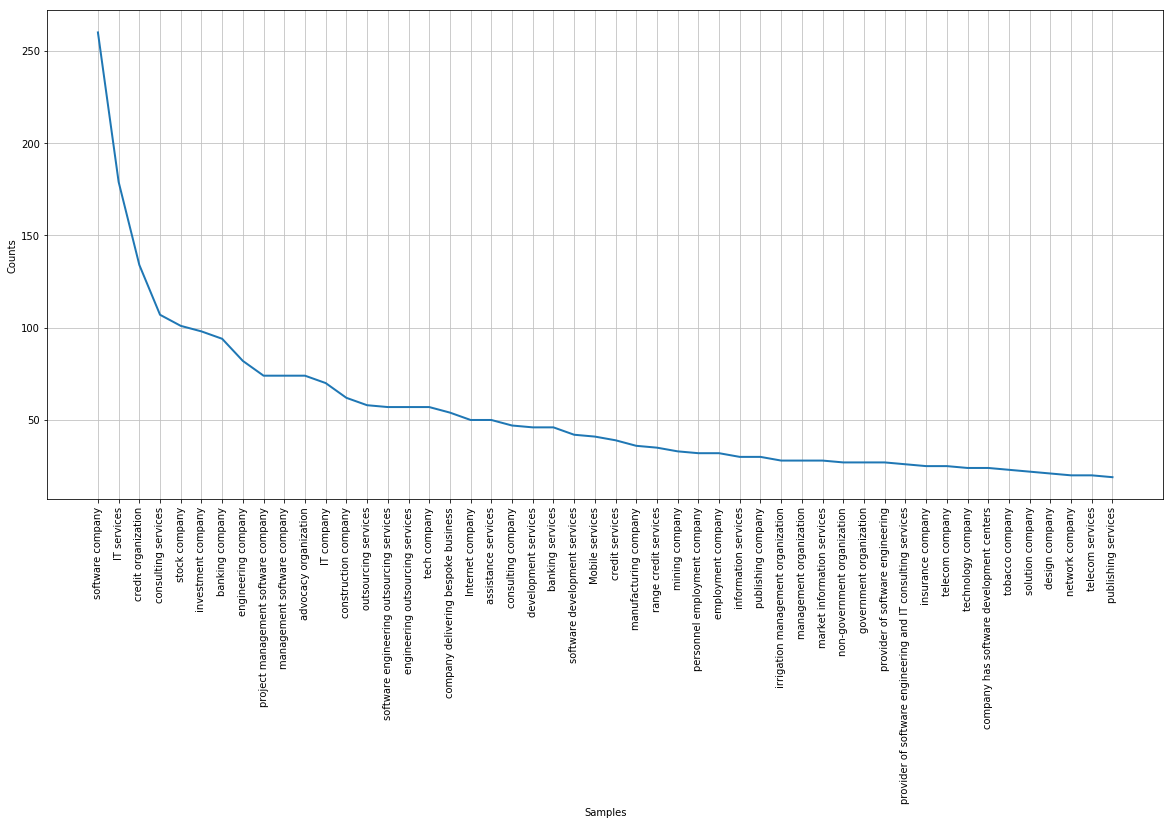

In [12]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(flat_list)  # case sensitive!
fd.most_common(50)
fd.plot(50)

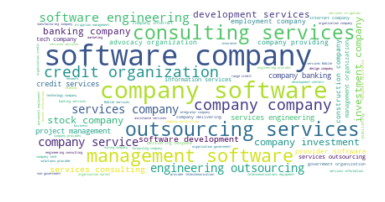

In [13]:
text_clean = " ".join(flat_list)
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

import numpy as np
test = np.array(matched_sents)
test[0]
df_test = pd.DataFrame(test)
df_test.columns = { 'tokens'}
df_test['tokens_joined'] = df_test.tokens.apply(preprocess)
df_test['tokens_joined'] = df_test.tokens.apply(lambda x: ' '.join(x))

df_test

,tokens,tokens_joined
0,"[non-profit organization, profit organization]",non-profit organization profit organization
1,"[non-profit organization, profit organization]",non-profit organization profit organization
2,"[non-profit organization, profit organization]",non-profit organization profit organization
3,"[non-profit organization, profit organization]",non-profit organization profit organization
4,[],
5,[],
6,[],
7,[],
8,[],
9,[],


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# refactor it to a function
def clusterdf(df_in, num):
    vec_tf = CountVectorizer()
    grain_tf = vec_tf.fit_transform(df_in['tokens_joined'])
    vec_tf = CountVectorizer(min_df=2)
    grain_tf = vec_tf.fit_transform(df_in['tokens_joined'])
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
    grain_tfidf = vec_tfidf.fit_transform(df_in['tokens_joined'])
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(100)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(grain_tfidf)
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))
    #print_terms(km3, num)
    
    original_space_centroids = svd.inverse_transform(km3.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
        
    plt.hist(km3.labels_, bins=num)
    plt.title('Cluster Frequencies')
    plt.show()

Explained variance of the SVD step: 96%
CPU times: user 164 ms, sys: 3.74 ms, total: 168 ms
Wall time: 41.8 ms
Clusters: 4
Silhouette Coefficient for clusters: 0.654
Cluster 0: company services engineering banking consulting it investment construction internet tech
Cluster 1: development company software services it engineering game infrastructure web range
Cluster 2: company software management it services project providing engineering bookmaker cosmetics
Cluster 3: organization profit non development credit advocacy government stock opportunity company


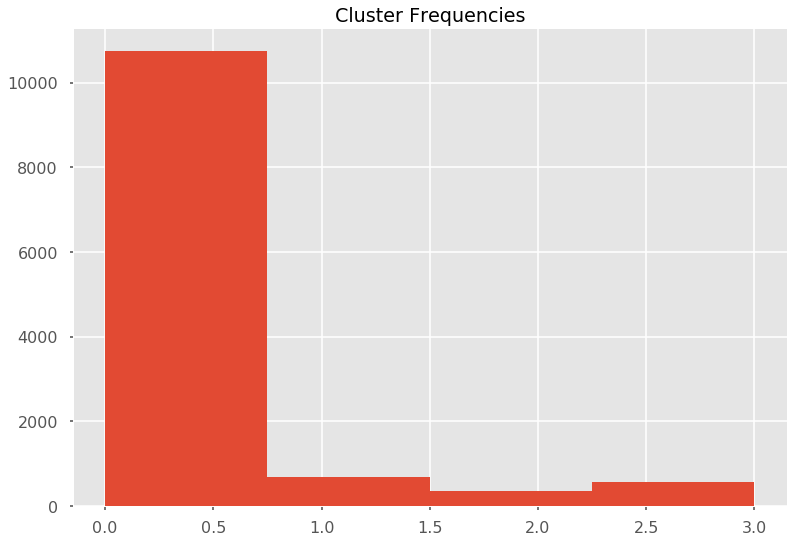

In [43]:
clusterdf(df_test, 4)


## Try topic modelling 

In [37]:
import logging
import gensim
from gensim import corpora

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
dictionary = corpora.Dictionary(df_test['tokens'])
print(dictionary)
dictionary.filter_extremes(no_below=5, no_above=0.7)
print(dictionary)

Dictionary(489 unique tokens: ['non-profit organization', 'profit organization', 'microfinance services', 'consulting services', 'Company is mortgage company']...)
Dictionary(169 unique tokens: ['non-profit organization', 'profit organization', 'consulting services', 'trading company', 'software company']...)


[(0, 0.013036612), (1, 0.018524202), (2, 0.014572405), (3, 0.95386684)]
[(0, 0.013036611), (1, 0.0185242), (2, 0.014572403), (3, 0.95386684)]
[(0, 0.013036612), (1, 0.018524202), (2, 0.014572405), (3, 0.95386684)]
[(0, 0.013036612), (1, 0.018524202), (2, 0.014572405), (3, 0.95386684)]
[(0, 0.22625062), (1, 0.3214878), (2, 0.25290433), (3, 0.19935724)]


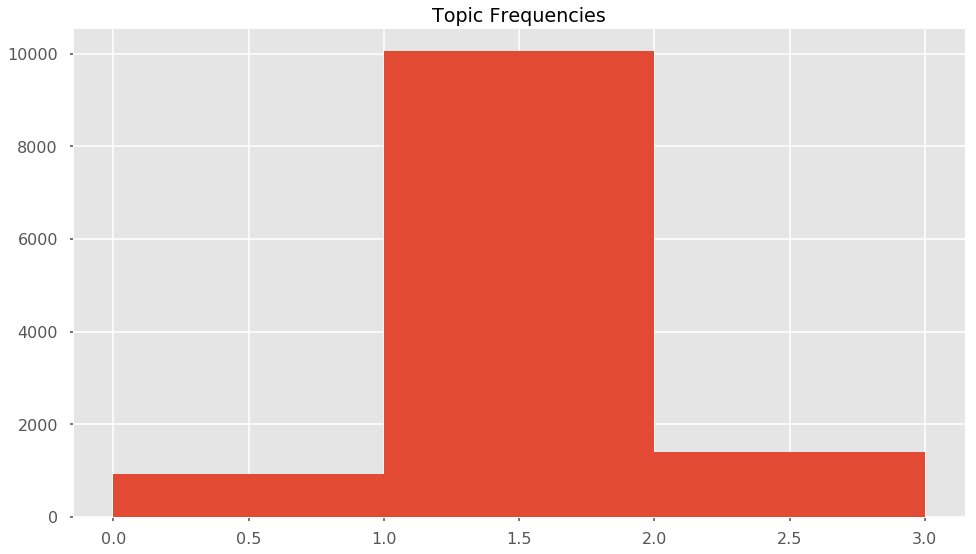

In [38]:


topic_num = 4

# Use the dictionary to prepare a DTM (using TF)
dtm_train = [dictionary.doc2bow(d) for d in df_test['tokens']]
lda = gensim.models.ldamodel.LdaModel(dtm_train, num_topics=topic_num, alpha='auto', chunksize=30, id2word=dictionary,
                                      passes=20, random_state=432)
lda.show_topics()
lda.show_topics(num_words=20)

dtopics_train = lda.get_document_topics(dtm_train)
# print topic distribution for 1st 5 rows
for i in range(0, 5):
    print(dtopics_train[i])

# get and plot the distribution of the topics
from operator import itemgetter
import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(16, 9))
top_train = [max(t, key=itemgetter(1))[0] for t in dtopics_train]
plt.hist(top_train, bins=topic_num-1)
plt.title('Topic Frequencies')
plt.show()

In [40]:
lda.show_topics()

[(0,
  '0.172*"publishing services" + 0.128*"provider with development bases" + 0.103*"advocacy organization" + 0.080*"technology company" + 0.070*"IT company" + 0.068*"information technology company" + 0.044*"telecom company" + 0.035*"research company" + 0.035*"integrator company" + 0.035*"system integrator company"'),
 (1,
  '0.421*"development company" + 0.347*"software development company" + 0.078*"IT services" + 0.055*"engineering development company" + 0.037*"software company" + 0.015*"web development company" + 0.010*"tech company" + 0.007*"transportation company" + 0.006*"management software company" + 0.006*"project management software company"'),
 (2,
  '0.171*"consulting services" + 0.107*"development organization" + 0.093*"engineering company" + 0.074*"construction company" + 0.056*"assistance services" + 0.054*"management services" + 0.045*"Company implements projects" + 0.044*"transport company" + 0.037*"HR management services" + 0.037*"turnkey HR services"'),
 (3,
  '0.1

Not very distinctive...

In [51]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

labels = set([w.label_ for w in doc.ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in doc.ents if label==e.label_] 
    entities = list(set(entities)) 
    print (label,entities)

LOC ['Newtown']
GPE ['Germany', 'Hungary', 'Russia', 'the United States', 'Netherlands', 'UK', 'Singapore', 'Poland', 'Belarus', 'Canada', 'Armenia', 'Sweden', 'Kazakhstan', 'Switzerland', 'Ukraine']
ORG ['EPAM Systems, Inc.', 'PA', 'NYSE', 'the USA', 'EPAM']
